In [1]:
import pandas as pd
import numpy as np

import acquire
from acquire import get_telco_data
import prepare
from prepare import split_function #,prep_telco 

from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [2]:
# Load the telco dataset using acquire.get_telco_data()
telco = acquire.get_telco_data()
telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,1,DSL,2,Mailed check,2,One year
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,DSL,2,Mailed check,1,Month-to-month
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,2,Fiber optic,1,Electronic check,1,Month-to-month
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,2,Fiber optic,1,Electronic check,1,Month-to-month
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,2,Fiber optic,2,Mailed check,1,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9979-RGMZT,Female,0,No,No,7,Yes,No,2,No,...,No,No,Yes,Yes,2,Fiber optic,2,Mailed check,2,One year
7039,9985-MWVIX,Female,0,No,No,1,Yes,No,2,No,...,No,No,No,No,2,Fiber optic,2,Mailed check,1,Month-to-month
7040,9986-BONCE,Female,0,No,No,4,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,None,3,Bank transfer (automatic),1,Month-to-month
7041,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,DSL,2,Mailed check,1,Month-to-month


In [3]:
telco.dtypes

customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges                object
churn                        object
customer_id                  object
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection           

In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

Your function is designed to obtain the Telco data from the database internally using the acquire.get_telco_data('telco_churn') function call within the function itself. So you don't need to pass any arguments to the prep_telco() function. Just call it directly, and it will pull the data, preprocess it, and return the preprocessed DataFrame.

In [3]:

# Use the prep_telco function
telco = prep_telco()
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies_yes,device_protection_no internet service,device_protection_yes,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,gender_encoded,contract_type_month_to_month
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,0,0,0,1,1,1,1,0,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,1,0,0,0,0,1,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,0,0,1,0,0,1,1,1,0,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,1,0,1,1,0,1,1,1,0,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,0,0,0,1,0,1,1,1,1,1


In [4]:
telco.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'payment_type',
       'contract_type', 'multiple_lines_no phone service',
       'multiple_lines_yes', 'online_security_no internet service',
       'online_security_yes', 'online_backup_no internet service',
       'online_backup_yes', 'payment_type_credit card (automatic)',
       'payment_type_electronic check', 'payment_type_mailed check',
       'contract_type_one year', 'contract_type_two year',
       'tech_support_no internet service', 'tech_support_yes',
       'streaming_tv_no internet service', 'streaming_tv_yes',
       'streaming_movies_no internet service',

In [5]:
telco.dtypes

customer_id                               object
gender                                    object
senior_citizen                             int64
partner                                   object
dependents                                object
tenure                                     int64
phone_service                             object
multiple_lines                            object
internet_service_type_id                   int64
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
contract_type_id                           int64
paperless_billing                         object
payment_type_id                            int64
monthly_charges                          float64
total_charges                            float64
churn               

In [6]:
telco.shape

(7043, 50)

Sample questions
What month are customers most likely to churn and does that depend on their contract type?

<Figure size 1200x800 with 0 Axes>

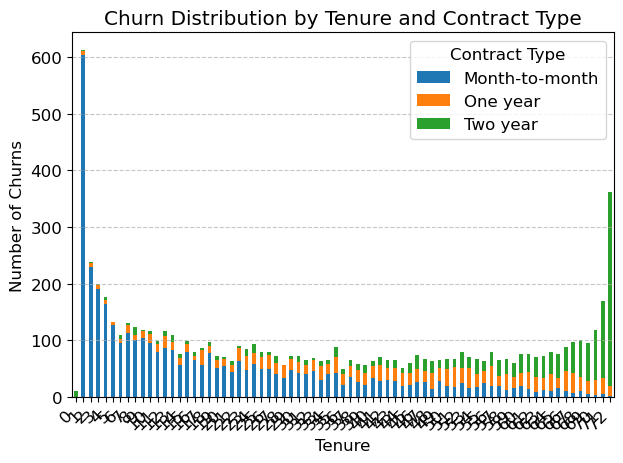

In [6]:
# Group by tenure (using 'tenure' column) and contract type
churn_by_tenure_contract = telco.groupby(['tenure', 'contract_type']).size().unstack()

# Increase the figure size and set font size
plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 12

# Plot the results with rotated X-axis labels
churn_by_tenure_contract.plot(kind='bar', stacked=True)

plt.xlabel('Tenure')
plt.ylabel('Number of Churns')
plt.title('Churn Distribution by Tenure and Contract Type')
plt.legend(title='Contract Type')

# Rotate X-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add grid lines for clarity
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
Even though the first 5 months seems to have churned quiet a lot of
customers, second month indicates the highest number of churns of customers who were on the month-to-month contract. type.


In [ ]:
Investigating
why they are motivated to do so?
Look for patterns or trends that might explain the higher churn rate 

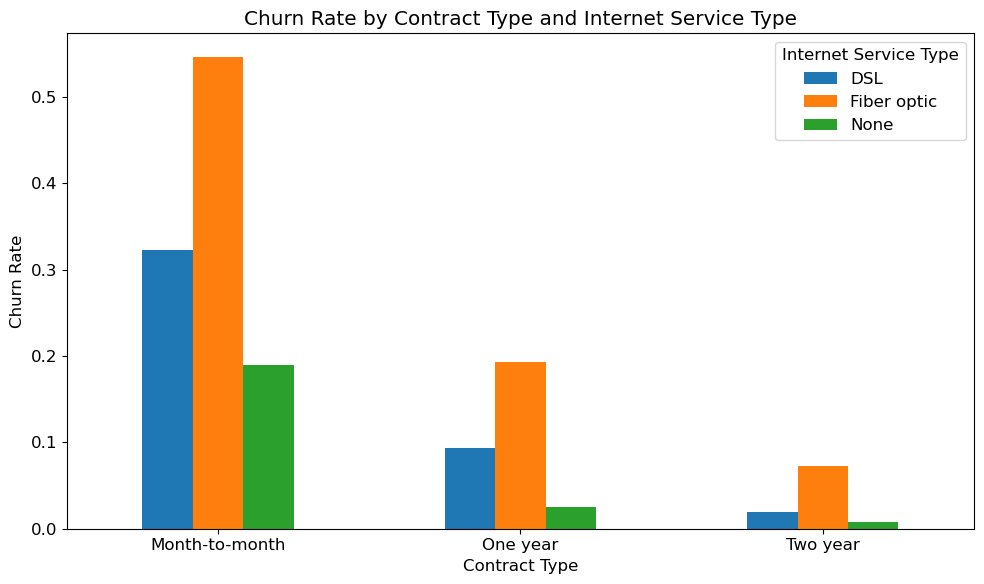

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('telco_data.csv')

# Calculate churn rate as a percentage
telco['churn_rate'] = (telco['churn'] == 'Yes').astype(int)

# Group by contract type, internet service type, and calculate mean churn rate
grouped_data = telco.groupby(['contract_type', 'internet_service_type'])['churn_rate'].mean().reset_index()

# Pivot the data for visualization
pivot_data = grouped_data.pivot(index='contract_type', columns='internet_service_type', values='churn_rate')

# Create grouped bar charts
pivot_data.plot(kind='bar', figsize=(10, 6))

plt.title('Churn Rate by Contract Type and Internet Service Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)

plt.legend(title='Internet Service Type')
plt.tight_layout()
plt.show()


The customer churn rate is influenced by Contract Type and Internet Service Type. There could be several reasons like Service Quality,Technology Reliability etc which influenced the higher customer churn rate for fiber optic internet service compared to DSL, for month-to-month, 1-year contract or 2-year contract customers.Analyze features such as monthly charges, contract type, and any additional services (e.g., online security, tech support) that might be influencing churn rates differently for Fiber optic users. Increased churn could be due to other factors like complaints related to internet service quality, speed, reliability, and customer support for Fiber optic.Investigating further on the reasons behind is beyond the scope of this project.

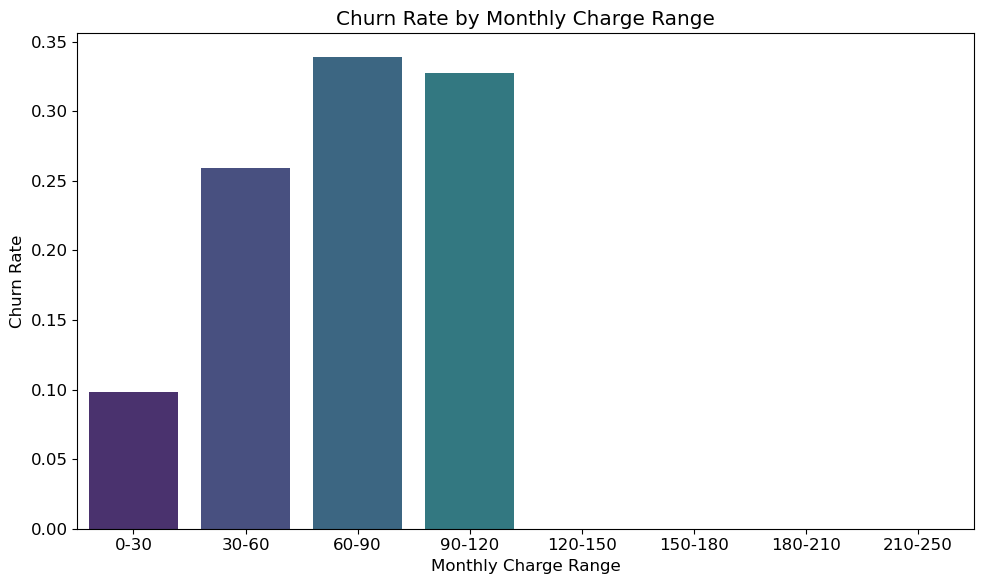

In [8]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# telco = pd.read_csv('telco_data.csv')

# Calculate churn rate as a percentage
telco['churn_rate'] = (telco['churn'] == 'Yes').astype(int)

# Define bins for monthly charges
bins = [0, 30, 60, 90, 120, 150, 180, 210, 250]
labels = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-250']

# Create a new column with monthly charge ranges
telco['monthly_charge_range'] = pd.cut(telco['monthly_charges'], bins=bins, labels=labels)

# Calculate churn rates within each charge range
churn_by_charge_range = telco.groupby('monthly_charge_range')['churn_rate'].mean().reset_index()

# Set up the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_by_charge_range, x='monthly_charge_range', y='churn_rate', palette='viridis')

plt.title('Churn Rate by Monthly Charge Range')
plt.xlabel('Monthly Charge Range')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()


In [ ]:
The customers who had to pay more than 60$ a month are more likely to churn.
Figure out the percentage of churn rate for above 60 monthly charge

In [13]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   customer_id                           7043 non-null   object  
 1   gender                                7043 non-null   object  
 2   senior_citizen                        7043 non-null   int64   
 3   partner                               7043 non-null   object  
 4   dependents                            7043 non-null   object  
 5   tenure                                7043 non-null   int64   
 6   phone_service                         7043 non-null   object  
 7   multiple_lines                        7043 non-null   object  
 8   internet_service_type_id              7043 non-null   int64   
 9   online_security                       7043 non-null   object  
 10  online_backup                         7043 non-null   object  
 11  stre

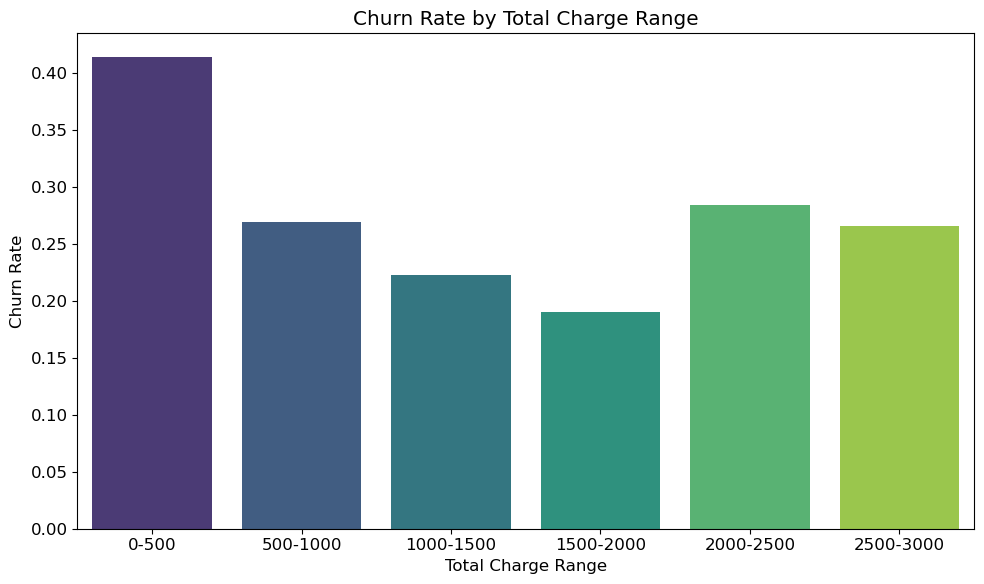

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#telco = pd.read_csv('telco_data.csv')

# Convert 'total_charges' column to numeric
telco['total_charges'] = pd.to_numeric(telco['total_charges'], errors='coerce')

# Calculate churn rate as a percentage
telco['churn_rate'] = (telco['churn'] == 'Yes').astype(int)

# Define bins for total charges
bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000']

# Create a new column with total charge ranges
telco['total_charge_range'] = pd.cut(telco['total_charges'], bins=bins, labels=labels)

# Calculate churn rates within each charge range
churn_by_total_charge_range = telco.groupby('total_charge_range')['churn_rate'].mean().reset_index()

# Set up the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_by_total_charge_range, x='total_charge_range', y='churn_rate', palette='viridis')

plt.title('Churn Rate by Total Charge Range')
plt.xlabel('Total Charge Range')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()


The customer churn rate is not influenced by the increase in total charges. It could be due to various factors like Perceived Value,Loyalty Programs etc. Beyond the scope of this project so didn't analyse any further.

In [15]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   customer_id                           7043 non-null   object  
 1   gender                                7043 non-null   object  
 2   senior_citizen                        7043 non-null   int64   
 3   partner                               7043 non-null   object  
 4   dependents                            7043 non-null   object  
 5   tenure                                7043 non-null   int64   
 6   phone_service                         7043 non-null   object  
 7   multiple_lines                        7043 non-null   object  
 8   internet_service_type_id              7043 non-null   int64   
 9   online_security                       7043 non-null   object  
 10  online_backup                         7043 non-null   object  
 11  stre

In [10]:
# Drop the original 'monthly_charge_range' and 'total_charge_range' columns
telco.drop(['monthly_charge_range', 'total_charge_range','churn_rate'], axis=1, inplace=True)


In [ ]:
Lets do 
Hypothesis Test:
Null Hypothesis (H0): The churn status and contract type are independent (i.e., no relationship).
Alternative Hypothesis (H1): The churn status and contract type are dependent (i.e., there's a relationship). 
                                                                                                                                                                  

- Prepare your data by creating a contingency table that shows the counts of churn and no-churn cases for each combination of contract type and churn month    

In [29]:
# Create the contingency table using 'churn' column
contingency_table = pd.crosstab(index=telco['churn'], columns=telco['contract_type'], margins=True)

# Print the contingency table
print(contingency_table)


contract_type  Month-to-month  One year  Two year   All
churn                                                  
No                       2220      1307      1647  5174
Yes                      1655       166        48  1869
All                      3875      1473      1695  7043


 - use a chi-squared test for independence
- This test will compute a chi-squared statistic and a p-value.

In [20]:
telco.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           7043 non-null   object 
 1   gender                                7043 non-null   object 
 2   senior_citizen                        7043 non-null   int64  
 3   partner                               7043 non-null   object 
 4   dependents                            7043 non-null   object 
 5   tenure                                7043 non-null   int64  
 6   phone_service                         7043 non-null   object 
 7   multiple_lines                        7043 non-null   object 
 8   internet_service_type_id              7043 non-null   int64  
 9   online_security                       7043 non-null   object 
 10  online_backup                         7043 non-null   object 
 11  streaming_tv     

In [4]:

alpha = 0.05

# Create the contingency table using 'churn' and 'contract_type' columns
contingency_table = pd.crosstab(index=telco['churn'], columns=telco['contract_type'], margins=True)

# Perform chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

if p_val <= alpha:
    print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
    print(f"P-Value: {p_val:.4f}")
    print("Result: Reject the null hypothesis. There is a significant relationship between the variables.")
else:
    print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
    print(f"P-Value: {p_val:.4f}")
    print("Result: Fail to reject the null hypothesis. There is no significant relationship between the variables.")



Chi-Squared Statistic: 1184.5966
P-Value: 0.0000
Result: Reject the null hypothesis. There is a significant relationship between the variables.


In [ ]:
Exploration Summary

In [ ]:
Our hypothesis proves that the churn status and contract type are dependent

<div style="background-color: lightgreen; padding: 40px; font-size: 18px;">
- How effectively can different classification models predict customer churn based on their tenure, monthly charges, and total charges?
    
 - How do different classification models perform in predicting customer churn using tenure, monthly charges, and total charges as features?   
    
    - How do tenure, monthly charges, and total charges impact customer churn?
    
    
</div>    

<style>
Implementing Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN) classification algorithms using Python's scikit-learn library:  


.output_stderr {
    color: cyan;
}
</style>


<div style="background-color: lightblue; padding: 40px; font-size: 18px;">
            Implementing Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN) classification algorithms using Python's scikit-learn library
</div>

In [5]:
telco.T




,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9964-WBQDJ,9965-YOKZB,9972-NKTFD,9975-GPKZU,9975-SKRNR,9979-RGMZT,9985-MWVIX,9986-BONCE,9992-UJOEL,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Female,Male,Female,Male,Male,Female,Female,Female,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,Yes,No,No,Yes,No,No,No,No,No,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,No,No,Yes,No,No,No,No,No,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,71,9,28,46,1,7,1,4,2,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,Yes,Yes,No,No,No,No,No,No,No,No phone service
internet_service_type_id,1,1,2,2,2,1,2,2,1,1,...,3,2,1,3,3,2,2,3,1,1
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No internet service,No,No,No internet service,No internet service,No,No,No internet service,No,Yes


In [8]:
# lets split our data into 3 - train,validate,test
train, validate, test = split_function(telco, 'churn')

In [14]:
telco.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'payment_type',
       'contract_type', 'multiple_lines_no phone service',
       'multiple_lines_yes', 'online_security_no internet service',
       'online_security_yes', 'online_backup_no internet service',
       'online_backup_yes', 'payment_type_credit card (automatic)',
       'payment_type_electronic check', 'payment_type_mailed check',
       'contract_type_one year', 'contract_type_two year',
       'tech_support_no internet service', 'tech_support_yes',
       'streaming_tv_no internet service', 'streaming_tv_yes',
       'streaming_movies_no internet service',

In [9]:

# For training set
columns_to_drop =['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 
       'churn', 'payment_type','internet_service_type',
       'multiple_lines_no phone service','contract_type',
       'multiple_lines_yes', 'online_security_no internet service',
       'online_security_yes', 'online_backup_no internet service',
       'online_backup_yes', 'payment_type_credit card (automatic)',
       'payment_type_electronic check', 'payment_type_mailed check',
       'contract_type_one year', 'contract_type_two year',
       'tech_support_no internet service', 'tech_support_yes',
       'streaming_tv_no internet service', 'streaming_tv_yes',
       'streaming_movies_no internet service', 'streaming_movies_yes',
       'device_protection_no internet service', 'device_protection_yes',
       'partner_encoded', 'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded', 'gender_encoded',
       'contract_type_month_to_month']


X_train = train.drop(columns=columns_to_drop)
y_train = train['churn_encoded']

# For validation set
X_val = validate.drop(columns=columns_to_drop)
y_val = validate['churn_encoded']

# For testing set
X_test = test.drop(columns=columns_to_drop)
y_test = test['churn_encoded']



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_val_pred = logreg_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    #(Receiver Operating Characteristic - Area Under the Curve)
    #ROC-AUC is a commonly used evaluation metric for binary classification problems
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

evaluate_model(y_val, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_val, rf_y_val_pred, "Random Forest")
evaluate_model(y_val, knn_y_val_pred, "K-Nearest Neighbors")


Model: Logistic Regression
Accuracy: 0.7871
Precision: 0.6480
Recall: 0.4332
F1-Score: 0.5192
ROC-AUC: 0.6741
confusion_matrix:
---------------
[[947  88]
 [212 162]]
Model: Random Forest
Accuracy: 0.7594
Precision: 0.5570
Recall: 0.4572
F1-Score: 0.5022
ROC-AUC: 0.6629
confusion_matrix:
---------------
[[899 136]
 [203 171]]
Model: K-Nearest Neighbors
Accuracy: 0.7665
Precision: 0.5748
Recall: 0.4626
F1-Score: 0.5126
ROC-AUC: 0.6694
confusion_matrix:
---------------
[[907 128]
 [201 173]]


In [ ]:
Of the three models, Logistic Regression is the best model with an accuracy of  0.7871    
confusion matrix:
The model correctly identified 947 non-churning customers (true negatives).
The model incorrectly classified 88 non-churning customers as churning (false positives).
The model missed 212 churning customers (false negatives).
The model correctly identified 162 churning customers (true positives).

How effectively can different classification models predict customer churn based on their  monthly charges?

In [13]:
# Load the telco dataset using acquire.get_telco_data()
telco = acquire.get_telco_data()
telco.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,1,DSL,2,Mailed check,2,One year
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,DSL,2,Mailed check,1,Month-to-month


In [14]:
# Use the prep_telco function
telco = prep_telco()
telco.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies_yes,device_protection_no internet service,device_protection_yes,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,gender_encoded,contract_type_month_to_month
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,0,0,0,1,1,1,1,0,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,1,0,0,0,0,1,0,0,0,1


In [17]:
# lets split our data into 3 - train,validate,test
train, validate, test = split_function(telco, 'churn')

In [18]:
# For training set
columns_to_drop =['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id','tenure','total_charges', 
       'churn', 'payment_type','internet_service_type',
       'multiple_lines_no phone service','contract_type',
       'multiple_lines_yes', 'online_security_no internet service',
       'online_security_yes', 'online_backup_no internet service',
       'online_backup_yes', 'payment_type_credit card (automatic)',
       'payment_type_electronic check', 'payment_type_mailed check',
       'contract_type_one year', 'contract_type_two year',
       'tech_support_no internet service', 'tech_support_yes',
       'streaming_tv_no internet service', 'streaming_tv_yes',
       'streaming_movies_no internet service', 'streaming_movies_yes',
       'device_protection_no internet service', 'device_protection_yes',
       'partner_encoded', 'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded', 'gender_encoded',
       'contract_type_month_to_month']


X_train = train.drop(columns=columns_to_drop)
y_train = train['churn_encoded']

# For validation set
X_val = validate.drop(columns=columns_to_drop)
y_val = validate['churn_encoded']

# For testing set
X_test = test.drop(columns=columns_to_drop)
y_test = test['churn_encoded']



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_val_pred = logreg_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    #(Receiver Operating Characteristic - Area Under the Curve)
    #ROC-AUC is a commonly used evaluation metric for binary classification problems
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

evaluate_model(y_val, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_val, rf_y_val_pred, "Random Forest")
evaluate_model(y_val, knn_y_val_pred, "K-Nearest Neighbors")


Model: Logistic Regression
Accuracy: 0.7346
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.5000
confusion_matrix:
---------------
[[1035    0]
 [ 374    0]]
Model: Random Forest
Accuracy: 0.6764
Precision: 0.3481
Recall: 0.2513
F1-Score: 0.2919
ROC-AUC: 0.5406
confusion_matrix:
---------------
[[859 176]
 [280  94]]
Model: K-Nearest Neighbors
Accuracy: 0.7005
Precision: 0.3889
Recall: 0.2246
F1-Score: 0.2847
ROC-AUC: 0.5485
confusion_matrix:
---------------
[[903 132]
 [290  84]]


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Of the three models, Logistic Regression is the best model with an accuracy of 0.7346    
confusion matrix:

<div style="background-color: lightgreen; padding: 40px; font-size: 18px;">
Identify contributing factors of customer churns ? 
 
    
OR
    
Do customers who churn have a higher average monthly spend than those who don't?
    
</div> 

In [45]:
# Load the telco dataset using acquire.get_telco_data()
telco = acquire.get_telco_data()
telco.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,1,DSL,2,Mailed check,2,One year
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,DSL,2,Mailed check,1,Month-to-month


In [46]:
# Use the prep_telco function
telco = prep_telco()
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies_yes,device_protection_no internet service,device_protection_yes,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,gender_encoded,contract_type_month_to_month
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,0,0,0,1,1,1,1,0,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,1,0,0,0,0,1,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,0,0,1,0,0,1,1,1,0,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,1,0,1,1,0,1,1,1,0,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,0,0,0,1,0,1,1,1,1,1


                 total_charges  monthly_charges    tenure
total_charges         1.000000         0.651174  0.826178
monthly_charges       0.651174         1.000000  0.247900
tenure                0.826178         0.247900  1.000000


<Axes: >

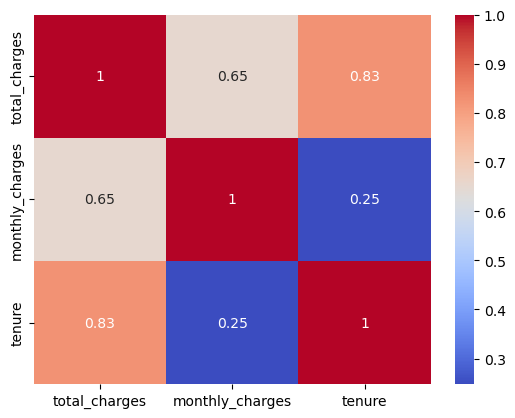

In [28]:
#Correlation Analysis:

import seaborn as sns

# Select numerical columns for correlation analysis
numerical_columns = ['total_charges', 'monthly_charges', 'tenure']

# Create the correlation matrix
correlation_matrix = telco[numerical_columns].corr()
print(correlation_matrix)
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [ ]:
This heatmap shows that 
1. there is a positive correlation between tenure and total_charges
2. there is a moderate positive correlation between monthly_charges and tenure
3. there is a weak positive correlation between monthly_charges and total_charges

Text(0.5, 1.0, 'Distribution of Total Charges by Churn')

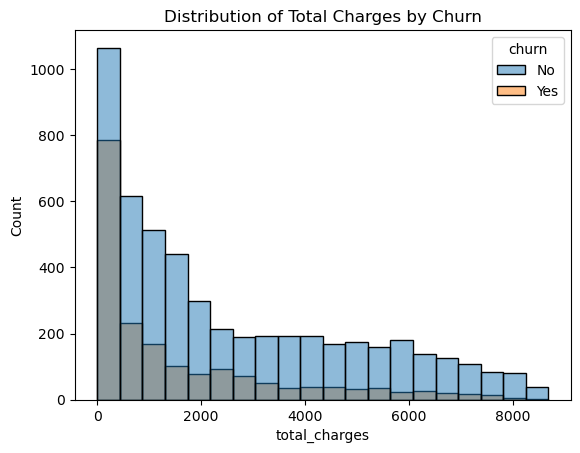

In [24]:
#Feature Distribution:

#understanding how the 'total_charges' values are distributed across different customer groups.
sns.histplot(data=telco, x='total_charges', hue='churn', bins=20)

# Add title to the plot
plt.title('Distribution of Total Charges by Churn')

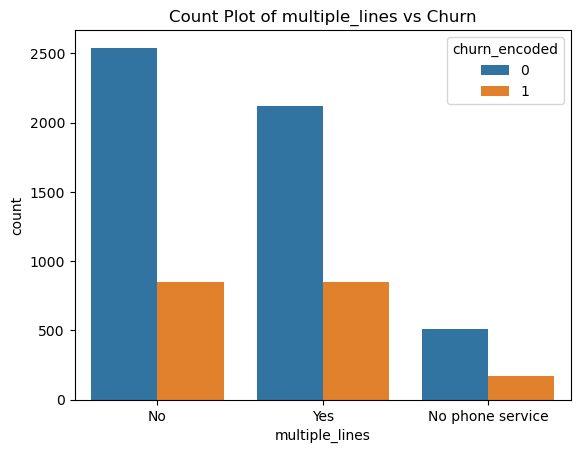

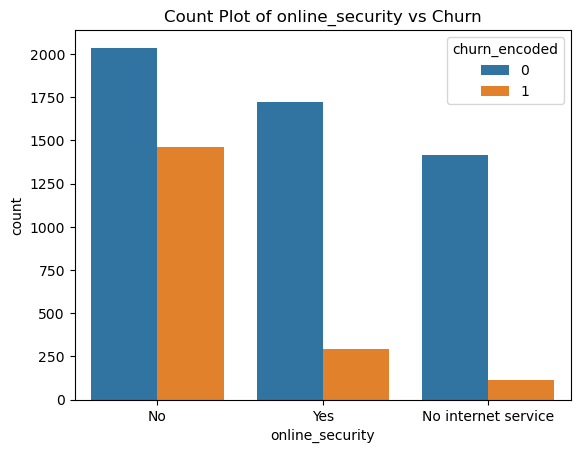

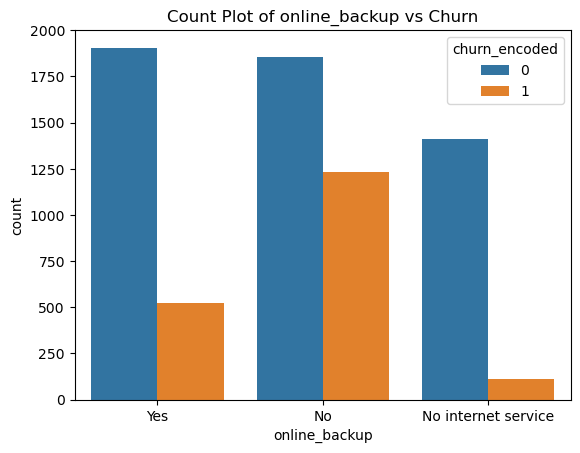

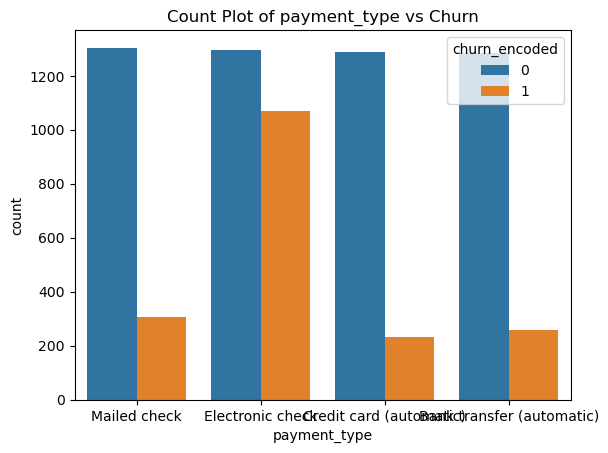

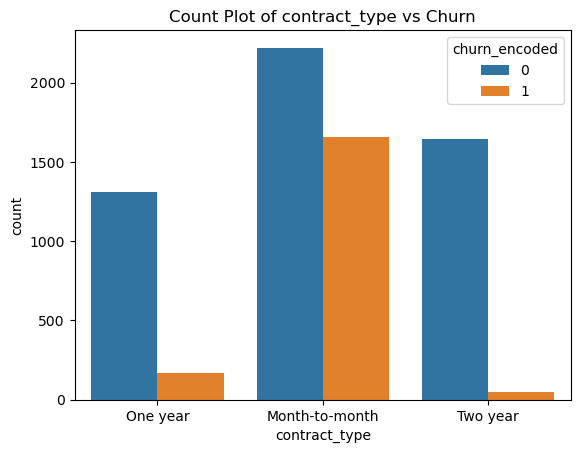

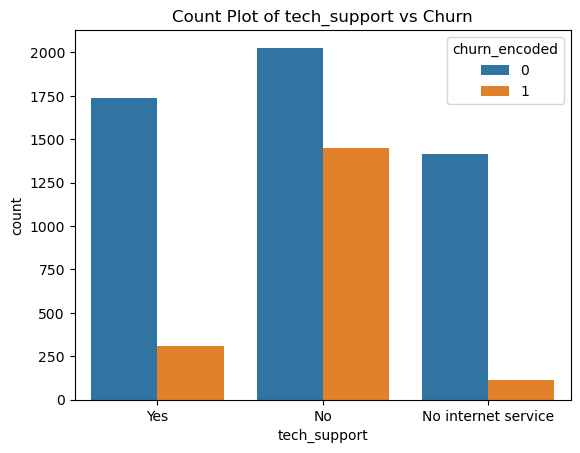

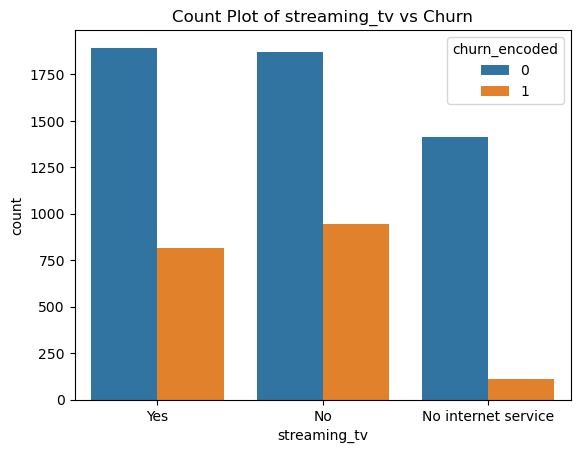

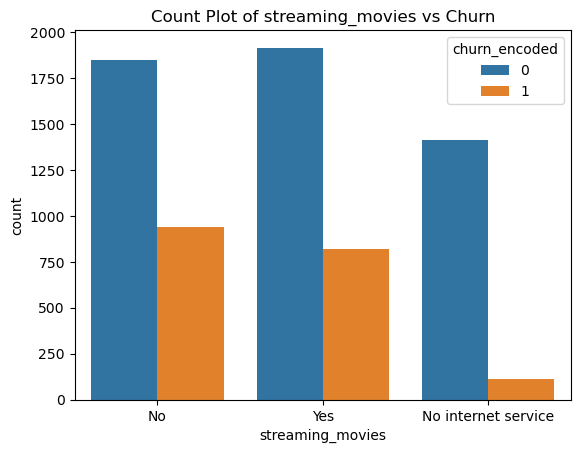

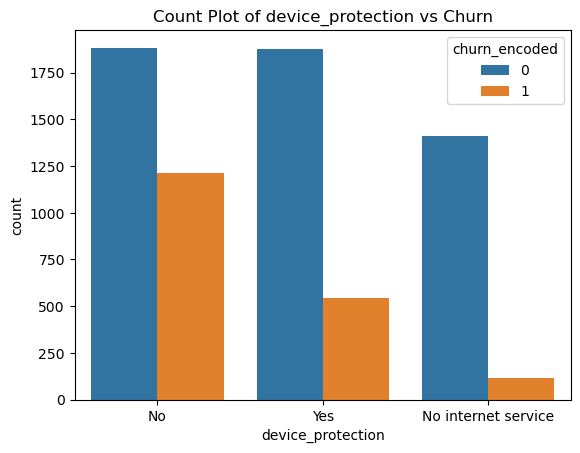

In [32]:
#Categorical Feature Analysis:

categorical_columns = ['multiple_lines', 'online_security', 'online_backup', 'payment_type',
                       'contract_type', 'tech_support', 'streaming_tv', 'streaming_movies',
                       'device_protection']

# Select the categorical columns and the target column 'churn_encoded'
categorical_data = telco[categorical_columns + ['churn_encoded']]

# Loop through the categorical columns and create count plots
for col in categorical_columns:
    sns.countplot(data=categorical_data, x=col, hue='churn_encoded')
    plt.title(f'Count Plot of {col} vs Churn')
    plt.show()


- In 'payment_type' customers doing electronic check has a higher churn rate than the rest of the payment types

- In 'contract_type' customers on month-to-month churn more than other contract types

- In 'tech_support' customers on no-tech-support have churned more than with-tech-support and no-internet-service

- In 'device_protection' customers on no device_protection churned more than with-device_protection and 
  no-internet-service
  
- In 'online_security' customers on no online_security churned more than without-online_security and 
  no-internet-service

In [40]:
telco.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9964-WBQDJ,9965-YOKZB,9972-NKTFD,9975-GPKZU,9975-SKRNR,9979-RGMZT,9985-MWVIX,9986-BONCE,9992-UJOEL,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Female,Male,Female,Male,Male,Female,Female,Female,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,Yes,No,No,Yes,No,No,No,No,No,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,No,No,Yes,No,No,No,No,No,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,71,9,28,46,1,7,1,4,2,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,Yes,Yes,No,No,No,No,No,No,No,No phone service
internet_service_type_id,1,1,2,2,2,1,2,2,1,1,...,3,2,1,3,3,2,2,3,1,1
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No internet service,No,No,No internet service,No internet service,No,No,No internet service,No,Yes


In [ ]:
# Statistical Tests:Mann-Whitney U Test
# Comparing Means of Two Groups (Churned and Non-Churned):

Null Hypothesis (H0): There is no significant difference in the 'monthly_charges' between churned and non-churned customers.

Alternative Hypothesis (H1):There is a significant difference in the 'monthly_charges' between the churned and non-churned customers.

In [61]:
#Mann-Whitney U Test. This test is a non-parametric test used to compare the distributions of 
#two independent groups (in this case, churned and non-churned customers) to determine if they come 
#from the same population or if they have significantly different distributions.

from scipy.stats import ranksums

churned = telco[telco['churn_encoded'] == 1]['monthly_charges']
non_churned = telco[telco['churn_encoded'] == 0]['monthly_charges']

statistic, p_value = ranksums(churned, non_churned)

print("Wilcoxon Rank-Sum Test:")
print(f"Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: The distributions are not significantly different.")


Wilcoxon Rank-Sum Test:
Statistic: 15.5029
P-value: 0.0000
Reject the null hypothesis: The distributions are significantly different.


Summary:Based on the low p-value, we can conclude that there is a significant difference in the 'monthly_charges' of customers who churn and those who don't. 

In [50]:
# lets split our data into 3 - train,validate,test
train, validate, test = split_function(telco, 'churn')

In [51]:
#Keeping 'paperless_billing_encoded','tenure','total_charges','monthly_charges',

# For training set
columns_to_drop =['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents','tech_support',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 
       'churn', 'payment_type','internet_service_type',
       'multiple_lines_no phone service','contract_type',
       'multiple_lines_yes', 'online_security_no internet service',
       'online_security_yes', 'online_backup_no internet service',
       'online_backup_yes', 'payment_type_credit card (automatic)',
       'payment_type_electronic check', 'payment_type_mailed check',
       'contract_type_one year', 'contract_type_two year',
       'tech_support_no internet service', 'tech_support_yes',
       'streaming_tv_no internet service', 'streaming_tv_yes',
       'streaming_movies_no internet service', 'streaming_movies_yes',
       'device_protection_no internet service', 'device_protection_yes',
       'partner_encoded', 'dependents_encoded', 'phone_service_encoded',
        'churn_encoded', 'gender_encoded',
       'contract_type_month_to_month']


X_train = train.drop(columns=columns_to_drop)
y_train = train['churn_encoded']

# For validation set
X_val = validate.drop(columns=columns_to_drop)
y_val = validate['churn_encoded']

# For testing set
X_test = test.drop(columns=columns_to_drop)
y_test = test['churn_encoded']



Model: Logistic Regression
Accuracy: 0.7857
Precision: 0.6429
Recall: 0.4332
F1-Score: 0.5176
ROC-AUC: 0.6731
confusion_matrix:
---------------
[[945  90]
 [212 162]]
Model: Random Forest
Accuracy: 0.7622
Precision: 0.5639
Recall: 0.4599
F1-Score: 0.5066
ROC-AUC: 0.6657
confusion_matrix:
---------------
[[902 133]
 [202 172]]
Model: K-Nearest Neighbors
Accuracy: 0.7644
Precision: 0.5724
Recall: 0.4439
F1-Score: 0.5000
ROC-AUC: 0.6620
confusion_matrix:
---------------
[[911 124]
 [208 166]]

Feature Importance Analysis:
                     Feature  Importance
1            monthly_charges    0.388281
2              total_charges    0.348926
0                     tenure    0.231071
3  paperless_billing_encoded    0.031723


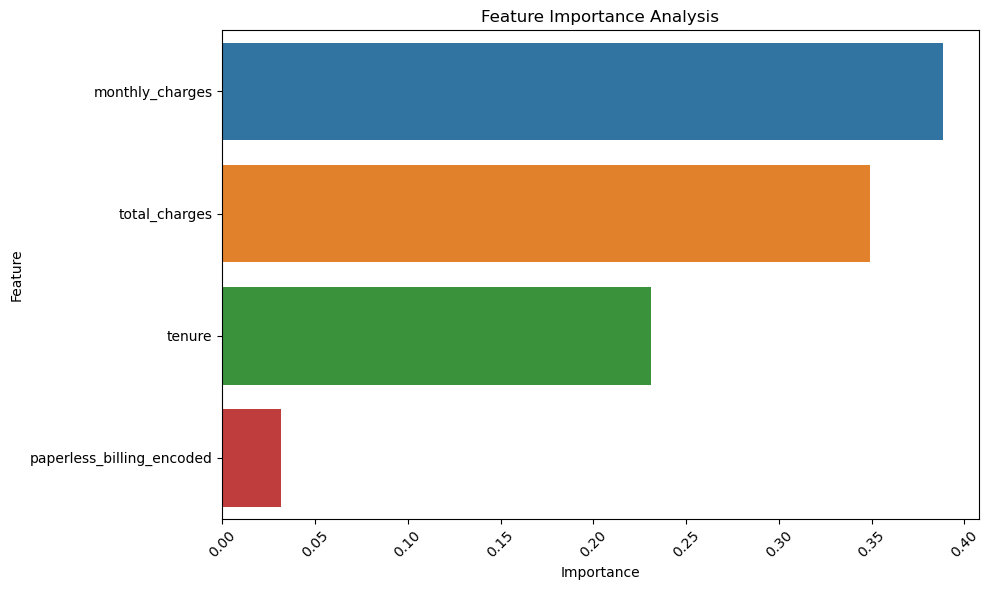

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_val_pred = logreg_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

# Evaluate models
evaluate_model(y_val, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_val, rf_y_val_pred, "Random Forest")
evaluate_model(y_val, knn_y_val_pred, "K-Nearest Neighbors")

# Feature Importance Analysis using Random Forest
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances along with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("\nFeature Importance Analysis:")
print(feature_importance_df)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title("Feature Importance Analysis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Summary:-
Higher monthly charges may be associated with higher customer dissatisfaction or financial strain, potentially leading to churn.    

<div style="background-color: lightgreen; padding: 40px; font-size: 18px;">
Are customers with DSL more or less likely to churn?
</div> 

In [2]:
# Load the telco dataset using acquire.get_telco_data()
telco = acquire.get_telco_data()
telco.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,1,DSL,2,Mailed check,2,One year
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,DSL,2,Mailed check,1,Month-to-month
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,2,Fiber optic,1,Electronic check,1,Month-to-month


In [22]:
import pandas as pd
import numpy as np
import env
import acquire
import os
#------------------- import splitting functions-------------------
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


def prep_telco():
    '''
    
    Pulls data from mySql server and drops duplicate columns and values (keeps 1 of needed)
    encodes all categorical data and drops columns that are unnecessary as a by product of 
    new dummy columns.
    '''
    # pulling data from mysql using get_telco_data
    telco = acquire.get_telco_data('telco_churn')
    # removing duplicate columns
    telco = telco.loc[:,~telco.columns.duplicated()].copy()
    #encoding categorical type data
    dummy_df = pd.get_dummies(telco[['multiple_lines','online_security','online_backup','payment_type',
                                'contract_type', 'tech_support','streaming_tv','streaming_movies',
                                'device_protection','internet_service_type']],dtype=int ,drop_first=True)
    telco['partner_binary'] = pd.get_dummies(telco['partner'], dtype=int, drop_first=True)
    telco['dependents_binary'] = pd.get_dummies(telco['dependents'], dtype=int,drop_first=True)
    telco['phone_service_binary'] = pd.get_dummies(telco['phone_service'], dtype=int, drop_first=True)
    telco['gender_binary'] = pd.get_dummies(telco['gender'], dtype=int, drop_first=True)
    telco['paperless_billing_binary'] = pd.get_dummies(telco['paperless_billing'], dtype=int, drop_first=True)
    telco['churn_binary'] = pd.get_dummies(telco['churn'], dtype=int, drop_first=True)
    telco = pd.concat([telco, dummy_df], axis=1)

    # normalizing numerical data
    telco['total_charges'] = telco['total_charges'].str.replace(' ','0').astype('float')

    # dropping extra columns after encoding
    telco = telco.drop(columns=['online_security_No internet service',
                    'online_security_No internet service','online_backup_No internet service',
                    'tech_support_No internet service','streaming_tv_No internet service','streaming_movies_No internet service','device_protection_No internet service',
                    'tech_support','device_protection'])

    # restoring 'drop_first' column for contract_type as it is desired to specify just this value type (without deducting)
    telco['contract_type_month_to_month'] = telco['contract_type'] == 'Month-to-month'
    telco['contract_type_month_to_month'] = telco['contract_type_month_to_month'].astype('int')
    
    # Encoding internet_service_type using one-hot encoding
    internet_service_type_encoded = pd.get_dummies(telco['internet_service_type'], dtype=int, prefix='internet_service_type')
    telco = pd.concat([telco, internet_service_type_encoded], axis=1)

    # lowering all column names
    telco.columns = map(str.lower,telco.columns)
    telco.columns = telco.columns.str.replace(' ','_')
    
    telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
    telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})
    telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})
    telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})
    telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
    telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})

    return telco


In [23]:
# Use the prep_telco function
telco = prep_telco()
telco.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,contract_type_month_to_month,internet_service_type_dsl,internet_service_type_fiber_optic,internet_service_type_none,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,0,1,0,0,1,1,1,1,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,1,1,0,0,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,1,0,1,0,0,0,0,1,1,1


In [24]:
telco.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'streaming_tv', 'streaming_movies',
       'contract_type_id', 'paperless_billing', 'payment_type_id',
       'monthly_charges', 'total_charges', 'churn', 'internet_service_type',
       'payment_type', 'contract_type', 'partner_binary', 'dependents_binary',
       'phone_service_binary', 'gender_binary', 'paperless_billing_binary',
       'churn_binary', 'multiple_lines_no_phone_service', 'multiple_lines_yes',
       'online_security_yes', 'online_backup_yes',
       'payment_type_credit_card_(automatic)', 'payment_type_electronic_check',
       'payment_type_mailed_check', 'contract_type_one_year',
       'contract_type_two_year', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'device_protection_yes',
       'internet_service_type_fiber_optic', 'internet_service_typ

Chi-Squared Test:
Chi-squared statistic: 732.3096
P-value: 0.0000


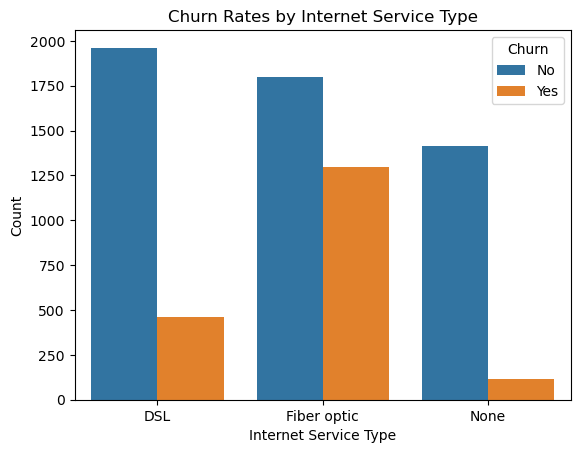

In [70]:
#Chi-squared test and visualization:performed on the relationship between 
#the "Internet Service Type" and "Churn" variables

import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency



# Create a contingency table for internet_service_type and churn
contingency_table = pd.crosstab(telco['internet_service_type'], telco['churn'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Squared Test:")
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print("=" * 50)

# Create a stacked bar plot
sns.countplot(data=telco, x='internet_service_type', hue='churn')

# Customize plot labels and legend
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.title('Churn Rates by Internet Service Type')
plt.legend(title='Churn')

# Show the plot
plt.show()


Summary:The p-value is very close to 0, which indicates that the association between "Internet Service Type" and "Churn" is statistically significant. The Chi-squared statistic being relatively large further supports the idea of a strong association between the two variables.

In [25]:
telco.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'streaming_tv', 'streaming_movies',
       'contract_type_id', 'paperless_billing', 'payment_type_id',
       'monthly_charges', 'total_charges', 'churn', 'internet_service_type',
       'payment_type', 'contract_type', 'partner_binary', 'dependents_binary',
       'phone_service_binary', 'gender_binary', 'paperless_billing_binary',
       'churn_binary', 'multiple_lines_no_phone_service', 'multiple_lines_yes',
       'online_security_yes', 'online_backup_yes',
       'payment_type_credit_card_(automatic)', 'payment_type_electronic_check',
       'payment_type_mailed_check', 'contract_type_one_year',
       'contract_type_two_year', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'device_protection_yes',
       'internet_service_type_fiber_optic', 'internet_service_typ

In [26]:
# lets split our data into 3 - train,validate,test
train, validate, test = split_function(telco, 'churn')

In [146]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,contract_type,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,gender_encoded,contract_type_month_to_month,fiber optic,none
5920,6689-VRRTK,Female,1,No,No,44,Yes,Yes,2,Yes,...,One year,0,0,1,1,0,1,0,True,False
2483,3800-LYTRK,Female,0,No,No,14,Yes,No,1,Yes,...,One year,0,0,1,0,0,1,0,False,False
5889,6615-NGGZJ,Male,0,No,No,14,Yes,Yes,2,No,...,Month-to-month,0,0,1,1,1,0,1,True,False
6077,7137-NAXML,Male,0,No,No,23,Yes,No,3,No internet service,...,One year,0,0,1,0,0,0,0,False,True
785,1142-IHLOO,Female,0,No,No,51,Yes,No,2,No,...,One year,0,0,1,0,0,1,0,True,False


In [19]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'streaming_tv', 'streaming_movies',
       'contract_type_id', 'paperless_billing', 'payment_type_id',
       'monthly_charges', 'total_charges', 'churn', 'internet_service_type',
       'payment_type', 'contract_type', 'partner_binary', 'dependents_binary',
       'phone_service_binary', 'gender_binary', 'paperless_billing_binary',
       'churn_binary', 'multiple_lines_no_phone_service', 'multiple_lines_yes',
       'online_security_yes', 'online_backup_yes',
       'payment_type_credit_card_(automatic)', 'payment_type_electronic_check',
       'payment_type_mailed_check', 'contract_type_one_year',
       'contract_type_two_year', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'device_protection_yes',
       'internet_service_type_fiber_optic', 'internet_service_typ

In [31]:

#Keeping 'internet_service_type_dsl','internet_service_type_fiber_optic', 'internet_service_type_none'
#'internet_service_type_dsl','internet_service_type_none','internet_service_type_fiber_optic', 
# Define columns to drop and categorical features for encoding
columns_to_drop = ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'streaming_tv', 'streaming_movies',
       'contract_type_id', 'paperless_billing', 'payment_type_id',
       'monthly_charges', 'total_charges', 'churn', 'internet_service_type',
       'payment_type', 'contract_type', 'partner_binary', 'dependents_binary',
       'phone_service_binary', 'gender_binary', 'paperless_billing_binary',
       'churn_binary', 'multiple_lines_no_phone_service', 'multiple_lines_yes',
       'online_security_yes', 'online_backup_yes',
       'payment_type_credit_card_(automatic)', 'payment_type_electronic_check',
       'payment_type_mailed_check', 'contract_type_one_year',
       'contract_type_two_year', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'device_protection_yes',
       'internet_service_type_fiber_optic', 'internet_service_type_none',
       'contract_type_month_to_month','gender_encoded', 'partner_encoded','dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded'
       ]


# Drop unnecessary columns
X_train = train.drop(columns=columns_to_drop)
y_train = train['churn_encoded']

# For validation set
X_val = validate.drop(columns=columns_to_drop)
y_val = validate['churn_encoded']

# For testing set
X_test = test.drop(columns=columns_to_drop)
y_test = test['churn_encoded']







In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_val_pred = logreg_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

# Convert 'No' and 'Yes' labels to 0 and 1 in predictions
logreg_y_val_pred = (logreg_y_val_pred == 'Yes').astype(int)
rf_y_val_pred = (rf_y_val_pred == 'Yes').astype(int)
knn_y_val_pred = (knn_y_val_pred == 'Yes').astype(int)




# Evaluate the models
evaluate_model(y_val, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_val, rf_y_val_pred, "Random Forest")
evaluate_model(y_val, knn_y_val_pred, "K-Nearest Neighbors")


/var/folders/hc/k8h5rkb97cx0qgd8n8r5rr9r0000gn/T/ipykernel_82397/4183088165.py:40: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  logreg_y_val_pred = (logreg_y_val_pred == 'Yes').astype(int)


AttributeError: 'bool' object has no attribute 'astype'

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import acquire
from acquire import get_telco_data
import prepare
from prepare import split_function #,prep_telco 

from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [60]:
# Load the telco dataset using acquire.get_telco_data()
telco = acquire.get_telco_data()
telco.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'customer_id', 'phone_service',
       'multiple_lines', 'internet_service_type_id', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'internet_service_type_id', 'internet_service_type',
       'payment_type_id', 'payment_type', 'contract_type_id', 'contract_type'],
      dtype='object')

In [61]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,1,DSL,2,Mailed check,2,One year
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,DSL,2,Mailed check,1,Month-to-month
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,2,Fiber optic,1,Electronic check,1,Month-to-month
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,2,Fiber optic,1,Electronic check,1,Month-to-month
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,2,Fiber optic,2,Mailed check,1,Month-to-month


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your data into the 'telco' DataFrame
# Replace 'data.csv' with your actual data file path
telco = acquire.get_telco_data()

# Drop irrelevant columns if needed
telco = telco.drop(['customer_id'], axis=1)

# Encode categorical variables
telco = pd.get_dummies(telco, columns=['multiple_lines', 'online_security', 'online_backup', 'payment_type',
                                       'contract_type', 'tech_support', 'streaming_tv', 'streaming_movies',
                                       'device_protection', 'internet_service_type'], drop_first=True)
 
telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})
telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})
telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})
telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})    
    
# Define the target column name
target_column = 'churn'  # Replace with your actual target column name

# Split data into features and target
X = telco.drop([target_column], axis=1)
y = telco[target_column]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'Male'

In [42]:
telco.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'phone_service', 'multiple_lines',
       'internet_service_type_id', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'internet_service_type_id', 'internet_service_type', 'payment_type_id',
       'payment_type', 'contract_type_id', 'contract_type'],
      dtype='object')

In [ ]:
# Initialize models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Train models
logreg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

# Make predictions
logreg_pred = logreg.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)

# Evaluate models
logreg_accuracy = accuracy_score(y_test, logreg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Print classification reports
print("Logistic Regression:")
print(classification_report(y_test, logreg_pred))

print("Random Forest:")
print(classification_report(y_test, rf_pred))

print("K-Nearest Neighbors:")
print(classification_report(y_test, knn_pred))


In [ ]:
# Create a bar chart to compare accuracies
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors']
accuracies = [logreg_accuracy, rf_accuracy, knn_accuracy]

plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.6, 1.0)
plt.show()
